<a href="https://colab.research.google.com/github/svanlinden/test/blob/master/knapzak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Knapzak
Je bevindt je in een **geheime kamer** die uitgerust is met een deur met **tijdslot**. Je ziet een timer aftellen die meldt dat je nog maar vijf minuten over het alvorens de deur voor altijd op slot zal zijn. Voor je neus liggen **waardevolle voorwerpen** met elk hun eigen **opbrengst en gewicht**. Je hebt een rugzak bij die een absoluut maximaal gewicht kan torsen van 750gr.

Stel de optimale rugzak samen. Je zou op een optimale opbrengst van 1458 moeten uitkomen (of toch zeker een waarde dicht daarbij in de buurt).

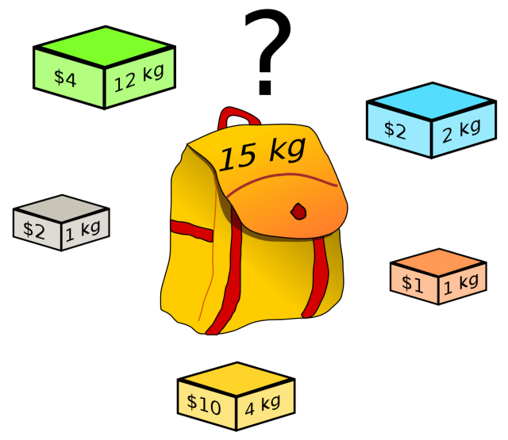

In [ ]:
from random import Random
import inspyred
from IPython.core.display import Image
from inspyred.ec import Individual
Image('../images/knapzak.png')

a) In de dataset **voorwerpen.xlsx** vind je de lijst van voorwerpen met hun gewicht en opbrengst. Lees deze in m.b.v. Pandas.

In [ ]:
# De oplossing is:
# [1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1] -> 1458
import pandas as pd
voorwerpen = pd.read_excel('../datasets/voorwerpen.xlsx', index_col=0)
voorwerpen

,weight,value
Item 1,70,135
Item 2,73,139
Item 3,77,149
Item 4,80,150
Item 5,82,156
Item 6,87,163
Item 7,90,173
Item 8,94,184
Item 9,98,192
Item 10,106,201


Een keuze van voorwerpen uit de geheime kamer zullen we voorstellen m.b.v. een rij van 0'en en 1'en, waarbij '0' staat voor laten liggen en '1' voor meenemen in onze rugzak.

Schrijf nu een functie <code>waarde</code> die voor een rij van 0'en 1'en kan berekenen wat de waarde is van die keuze van voorwerpen.
Als je keuze resulteert in een gewicht boven de 750gr dan geef je als waarde voor die keuze het exces terug als een negatief getal.

Tip: het is nuttig om Numpy arrays te werken, want die ondersteunen broadcasting.
``` python
import numpy as np
def waarde(weights: np.array, values: np.array, selection: np.array):
    pass # hier komt jouw code
```
Test deze functie uit voor willekeurige combinaties (tip: gebruik Numpy functie om combinaties te maken).

In [ ]:
import numpy as np
def waarde(weights: np.array, values: np.array, selection: np.array):
    total_weight = (selection * weights).sum()
    total_value = (selection * values).sum()
    if total_weight > 750:
        return 750 - total_weight
    return total_value

In [ ]:
waarde(voorwerpen.weight, voorwerpen.value , np.random.randint(0,2,size=15))

-18

Schrijf een functie <code>generate</code> die één kandidaat voorwerpselectie kan genereren.

Deze functie **moet** een Python-lijst teruggeven (en geen Numpy array). Indien nodig omzetten naar een Python-lijst of type hinting toevoegen (-> []) aan functie definitie. De functie moet ook volgende argumenten (ook al gebruik je ze niet allemaal) en return type hebben:

Probeer eventueel te werken met een optionele extra parameter die het aantal te selecteren voorwerpen bepaalt.
```python
def generate(random = None, args = {}) -> []:
    # je kan args dictionary gebruiken om parameters door te geven naar generate (zie verder)
    aantal_voorwerpen = args.get('aantal_voorwerpen', 15)
    # hier komt jouw code
```

In [ ]:
def generate(random = None, args = {}) -> []:
    # je kan args dictionary gebruiken om parameters door te geven naar generate (zie verder)
    aantal_voorwerpen = args.get('aantal_voorwerpen', 15)
    return np.random.randint(0,2,size=aantal_voorwerpen).tolist()

Schrijf een functie <code>evaluate</code> die één kandidaat-oplossing gegeneerd door <code>generate</code> kan evalueren.
De functie moet volgende argumenten hebben (ook al gebruik je ze niet allemaal):
```
def evaluate(candidates, args = {}):
    weights = args.get('weights', [])
    values = args.get('values', [])
    # de rest van de code
```

In [ ]:
def evaluate(candidates, args = {}):
    weights = args.get('weights', [])
    values = args.get('values', [])
    fitness = []
    for candidate in candidates:
        fitness.append(waarde(weights=weights, values=values, selection=candidate))
    return fitness


Gebruik nu een Genetic Algorithm uit de<code>inpyred</code>-library om de meest optimale oplossing te vinden.
Geef volgende extra parameters aan de <code>evolve</code>-methode mee:
* <code>weights = voorwerpen.weights</code>,
* <code>values = voorwerpen.values</code>,
* <code>aantal_voorwerpen = voorwerpen.shape[0]</code>

Experimenteer met de selector, de variator, de terminator en hun bijhorende parameters (zoek op in source code).
Je moet minsten 1450 of hoger uitkomen. De oplossing 1458 is redelijk moeilijk om te bereiken, maar kan behaald worden mits enkele runs met goede instellingen.

Sorteer en print alle oplossingen uit.

In [ ]:
rand = Random()
ga = inspyred.ec.GA(rand)
# ga.selector = inspyred.ec.selectors.tournament_selection
ga.variator = inspyred.ec.variators.n_point_crossover
ga.terminator = inspyred.ec.terminators.no_improvement_termination
population: [Individual] = ga.evolve(
    generator=generate,
    evaluator=evaluate,
    pop_size=100,
    maximize=True,
    bounder=inspyred.ec.Bounder(0, 1),
    tournament_size=10,
    num_elites = 4,
    num_crossover_points=5,
    max_evaluations=10000,
    mutation_rate=0.01,
    weights = voorwerpen.weight,
    values = voorwerpen.value,
    aantal_voorwerpen = voorwerpen.shape[0])

# Sort and print the best individual, who will be at index 0.
population.sort(reverse=True)
for solution in population:
    print('{} -> {}'.format(solution.candidate, waarde(voorwerpen.weight, voorwerpen.value, solution.candidate)))

[0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1] -> 1456
[0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1] -> 1456
[0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1] -> 1456
[0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1] -> 1456
[0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1] -> 1456
[0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1] -> 1456
[0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1] -> 1456
[0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1] -> 1456
[1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1] -> 1448
[1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1] -> 1448
[1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1] -> 1448
[1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1] -> 1448
[1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1] -> 1448
[1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1] -> 1448
[1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1] -> 1448
[1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1] -> 1448
[1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1] -> 1448
[1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1] -> 1448
[1, 1, 1, 0, 0, 1, 0, 0, 1, 

Gebruik nu Simulated Annealing uit de <code>inpyred</code>-library om de meest optimale oplossing te vinden. Geef zeker <code>temperature</code>, <code>cooling_rate</code> en <code>max_evaluations</code> op. Stel ook zeker de <code>terminator</code> in op <code>evaluation_termination</code>, en de variator op <code>bit_flip_mutation</code> (waarom?)

Experimenteer met de parameters. De optimale oplossing valt normaal regelmatig een keertje uit de bus.

In [ ]:
rand = Random()
sa = inspyred.ec.SA(rand)
sa.terminator = inspyred.ec.terminators.evaluation_termination
sa.variator = inspyred.ec.variators.bit_flip_mutation
population: [Individual] = sa.evolve(
    generator=generate,
    evaluator=evaluate,
    maximize=True,
    bounder=inspyred.ec.Bounder(0, 1),
    temperature = 5000,             # belangrijke parameter
    # cooling_rate = 0.70,            # belangrijke parameter
    max_evaluations = 10000,        # belangrijke parameter
    weights = voorwerpen.weight,
    values = voorwerpen.value,
    aantal_voorwerpen = voorwerpen.shape[0])

population.sort(reverse=True)
for solution in population:
    print('{} -> {}'.format(solution.candidate, waarde(voorwerpen.weight, voorwerpen.value, solution.candidate)))

[1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1] -> 1458


In [1]:
print('opvulling om te kunnen afdrukken \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n')

opvulling om te kunnen afdrukken 
















